In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Country-Data.csv')

In [2]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# Normalizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df.iloc[:,1:])

df_scaled = pd.DataFrame(np.c_[df['country'], df_scaled], columns=df.columns)

df_scaled

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.291532,-1.13828,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.67918
1,Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,-0.225578,0.200917,-0.571711,0.2407,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,Venezuela,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,Vietnam,-0.372315,1.130305,0.008877,1.38003,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,Yemen,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [4]:
# On utilise la PCA pour réduire la dimensionnalité du dataset à 2 pour faciliter la visualisation

from sklearn.decomposition import PCA
pca = PCA(n_components=2)

df_pca = pca.fit_transform(df_scaled.iloc[:,1:])

df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

df_pca = pd.concat([df_scaled['country'], df_pca], axis=1)

df_pca

,country,PC1,PC2
0,Afghanistan,-2.913025,0.095621
1,Albania,0.429911,-0.588156
2,Algeria,-0.285225,-0.455174
3,Angola,-2.932423,1.695555
4,Antigua and Barbuda,1.033576,0.136659
...,...,...,...
162,Vanuatu,-0.820631,0.639570
163,Venezuela,-0.551036,-1.233886
164,Vietnam,0.498524,1.390744
165,Yemen,-1.887451,-0.109453


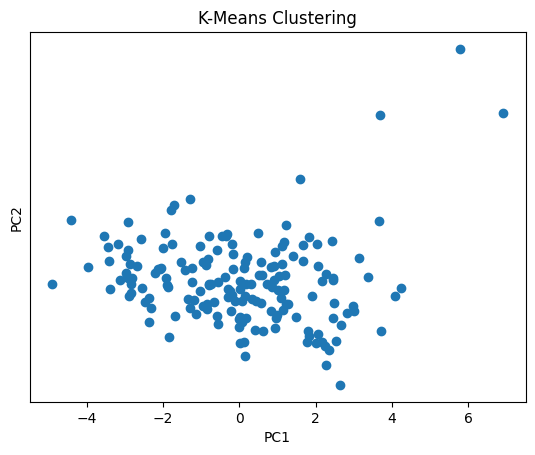

In [5]:
plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering')
plt.yticks([])
plt.show()

In [6]:
df_pca[['PC1', 'PC2']]

,PC1,PC2
0,-2.913025,0.095621
1,0.429911,-0.588156
2,-0.285225,-0.455174
3,-2.932423,1.695555
4,1.033576,0.136659
...,...,...
162,-0.820631,0.639570
163,-0.551036,-1.233886
164,0.498524,1.390744
165,-1.887451,-0.109453


In [7]:
np.array([df_pca['PC1'], df_pca['PC2']]).T.shape

(167, 2)

In [8]:
def kmeanspp(X, k):

    centroids = [X[np.random.choice(range(X.shape[0]))]]

    while len(centroids) < k:
        distances = np.array([min([np.linalg.norm(x - c)**2 for c in centroids]) for x in X])
        prob = distances / np.sum(distances)
        next_centroid = X[np.random.choice(range(X.shape[0]), p=prob)]
        centroids.append(next_centroid)

    centroids = np.array(centroids)

    while True:
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

In [9]:
labels, centroids = kmeanspp(df_pca[['PC1', 'PC2']].values, 3)

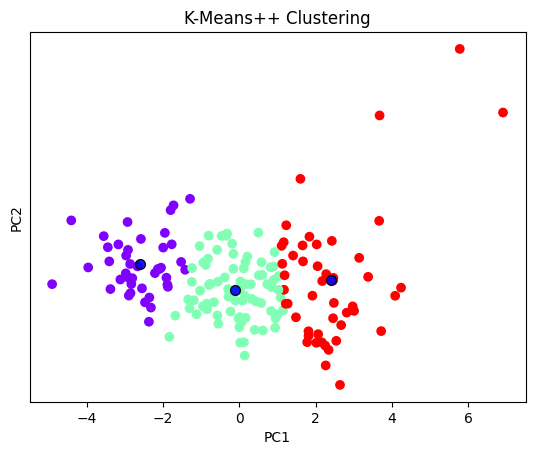

In [10]:
# affichage des clusters
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=labels, cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1], c='blue', s=50, marker='o', label='Centroids', alpha=0.9, edgecolor='black')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means++ Clustering')
plt.yticks([])
plt.show()